In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_missing_value

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import StandardScaler

# Import Data

In [2]:
df = pd.read_csv('../data/iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Cek Missing Value

,missing_value,%
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


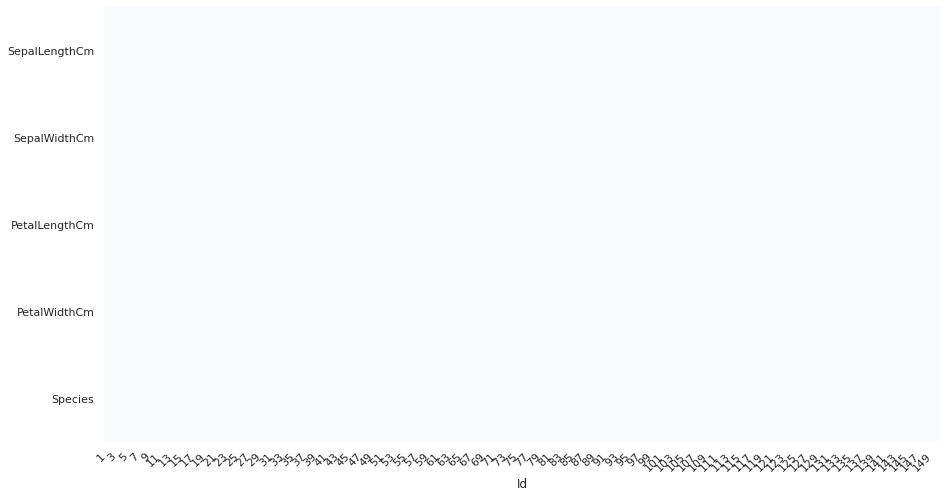

In [3]:
plot_missing_value(df, return_df=True)

# Cek Balance atau Tidak

In [4]:
df.Species.value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

# Visualisasi

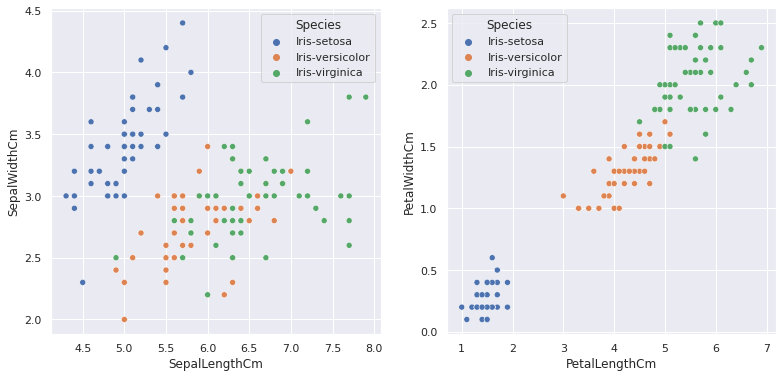

In [5]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.scatterplot(x=df.SepalLengthCm, y=df.SepalWidthCm, hue=df.Species)
plt.subplot(122)
sns.scatterplot(x=df.PetalLengthCm, y=df.PetalWidthCm, hue=df.Species);

# Dataset Splitting

In [6]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Training

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [8]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

### One vs Rest (One vs All)

In [13]:
# multi_class='ovr'
num_pipe = Pipeline([
('input', SimpleImputer(strategy='median')),
('scaling', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='ovr'))
])

model_ovr = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model_ovr.fit(X_train, y_train)

print(model_ovr.best_params_)
print(model_ovr.score(X_train, y_train), model_ovr.best_score_, model_ovr.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'algo__C': 100.0, 'algo__fit_intercept': True}
0.9666666666666667 0.9583333333333334 0.9333333333333333


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.2s finished


In [10]:
from sklearn.preprocessing import PowerTransformer

In [14]:
# With transform
num_pipe = Pipeline([
('input', SimpleImputer(strategy='median')),
('transform', PowerTransformer()),
('scaling', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='ovr'))
])

model_ovr_transform = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model_ovr_transform.fit(X_train, y_train)

print(model_ovr_transform.best_params_)
print(model_ovr_transform.score(X_train, y_train), model_ovr_transform.best_score_, model_ovr_transform.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'algo__C': 100.0, 'algo__fit_intercept': True}
0.9666666666666667 0.9583333333333334 0.9666666666666667


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.3s finished


### Multinomial (Softmax)

In [15]:
# multi_class='multinomial'
num_pipe = Pipeline([
('input', SimpleImputer(strategy='median')),
('scaling', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='multinomial'))
])

model_softmax = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model_softmax.fit(X_train, y_train)

print(model_softmax.best_params_)
print(model_softmax.score(X_train, y_train), model_softmax.best_score_, model_softmax.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 0.9666666666666667 1.0


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.3s finished


In [16]:
# With transform
num_pipe = Pipeline([
('input', SimpleImputer(strategy='median')),
('transform', PowerTransformer()),
('scaling', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='multinomial'))
])

model_softmax_transform = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model_softmax_transform.fit(X_train, y_train)

print(model_softmax_transform.best_params_)
print(model_softmax_transform.score(X_train, y_train), model_softmax_transform.best_score_, model_softmax_transform.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 0.9666666666666667 1.0


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished


# Save Model

In [17]:
import pickle

In [19]:
pickle.dump(model_ovr, (open('../model/model_ovr.pkl', 'wb')))
pickle.dump(model_ovr_transform, (open('../model/model_ovr_transform.pkl', 'wb')))
pickle.dump(model_softmax, (open('../model/model_softmax.pkl', 'wb')))
pickle.dump(model_softmax_transform, (open('../model/model_softmax_transform.pkl', 'wb')))